In [6]:
#In this part of the project, I identify topics of artilces based on keywords from URLs
import pandas as pd
import numpy as np
#reading the data file with top 5 most important keywords
df = pd.read_csv (r'C:\Users\emich\Google Drive\Data science\Capstone 1\final.csv',index_col=None, header=[0])
print (df.head())

#removing special characters and tf-ids values in an additional column
import re
def pre_process(text):
    
    #remove tags
    text=re.sub("</?.*?>"," <>, ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ", text)
    
    return text
df['text'] = df ['keywords'].apply(lambda x:pre_process(x))
print (df.head())


                            netloc  \
0             virtual-strategy.com   
1                www.publicnow.com   
2                www.mena-tech.com   
3                www.mena-tech.com   
4  www.insurance.onlystrategic.com   

                                                path  \
0   2020 05 26 %E3%80%90scandit%E3%80%91 %E3%82%B...   
1      view 4A3C6A23AA89F7311E014F7AC701921A7793646F   
2   %D9%83%D9%8A%D9%81 %D8%AA%D8%AD%D8%A7%D9%81%D...   
3   %D9%85%D9%82%D8%A7%D8%A8%D9%84%D8%A9 %D9%85%D...   
4   features index id 1 article 73425 key 81d01a3...   

                       ('url', 'Unnamed: 0_level_1')  \
0  https://virtual-strategy.com/2020/05/26/%E3%80...   
1  http://www.publicnow.com/view/4A3C6A23AA89F731...   
2  https://www.mena-tech.com/%D9%83%D9%8A%D9%81-%...   
3  https://www.mena-tech.com/%D9%85%D9%82%D8%A7%D...   
4  http://www.insurance.onlystrategic.com/feature...   

   ('5/10/2020', 'Impressions')  ('5/10/2020', 'Unique Users')  \
0                             0

In [7]:
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy  

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
data = list (df ['text'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


[['aa', 'bac', 'scandit', 'ae', 'bf']]


In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['aa', 'bac', 'scandit', 'ae', 'bf']


In [12]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]




In [38]:

# Remove Stop Words
data = list (df ['text'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
print (data_words_nostops [:1])

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

print (data_words_bigrams [:2])
#something is not working in lemmatization





[['aa', 'bac', 'scandit', 'ae', 'bf']]
[['aa', 'bac', 'scandit', 'ae', 'bf']]
[['aa', 'bac', 'scandit', 'ae', 'bf'], ['aa', 'ac', 'view']]


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None



def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


# Lemmatizing
df['Lemmatize'] = df['text'].apply(lambda x: lemmatize_sentence(x))
print(df [:1])


                 netloc                                               path  \
0  virtual-strategy.com   2020 05 26 %E3%80%90scandit%E3%80%91 %E3%82%B...   

                       ('url', 'Unnamed: 0_level_1')  \
0  https://virtual-strategy.com/2020/05/26/%E3%80...   

   ('5/10/2020', 'Impressions')  ('5/10/2020', 'Unique Users')  \
0                             0                              0   

   ('5/11/2020', 'Impressions')  ('5/11/2020', 'Unique Users')  \
0                             0                              0   

   ('5/12/2020', 'Impressions')  ('5/12/2020', 'Unique Users')  \
0                             0                              0   

   ('5/13/2020', 'Impressions')  ...  ('6/21/2020', 'Impressions')  \
0                             0  ...                             0   

   ('6/21/2020', 'Unique Users')  ('6/22/2020', 'Impressions')  \
0                              0                             0   

   ('6/22/2020', 'Unique Users')  ('6/23/2020', 'Impressi

In [14]:
data_lemmatized = df['Lemmatize'].str.split(' ')

print (data_lemmatized [:1])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

0    [aa, bac, scandit, ae, bf]
Name: Lemmatize, dtype: object
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [15]:
#Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.020*"service" + 0.019*"article" + 0.014*"redirector" + 0.007*"time" + 0.006*"strategy" + 0.005*"post" + 0.004*"pressrelease" + 0.004*"city" + 0.004*"step" + 0.004*"day"'), (1, '0.012*"job" + 0.011*"market" + 0.010*"news" + 0.009*"developer" + 0.007*"expat" + 0.007*"board" + 0.006*"letter" + 0.005*"award" + 0.005*"question" + 0.005*"sport"'), (2, '0.025*"article" + 0.017*"work" + 0.012*"news" + 0.012*"home" + 0.012*"coronavirus" + 0.010*"archive" + 0.009*"may" + 0.008*"update" + 0.008*"covid" + 0.007*"tech"'), (3, '0.019*"php" + 0.008*"tlx" + 0.006*"acura" + 0.006*"reopen" + 0.005*"business" + 0.005*"sale" + 0.005*"news" + 0.005*"grow" + 0.004*"job" + 0.004*"feature"'), (4, '0.022*"sell" + 0.016*"nysecrm" + 0.012*"nysenow" + 0.009*"nasdaqwday" + 0.009*"llc" + 0.009*"holding" + 0.008*"capital" + 0.008*"position" + 0.008*"share" + 0.007*"investment"'), (5, '0.012*"pr" + 0.011*"news" + 0.008*"earnings" + 0.008*"htm" + 0.008*"list" + 0.007*"quadrant" + 0.007*"blog" + 0.006*"offer" +

In [42]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.9600063210582

Coherence Score:  0.5426865511214212


In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.305259 -0.020683       1        1  16.393345
2     -0.099402  0.028117       2        1  15.376917
3     -0.040856 -0.043606       3        1  14.595360
1     -0.014340  0.249300       4        1  13.667401
5     -0.020867 -0.010639       5        1  13.564192
0     -0.085285 -0.040894       6        1  13.411649
6     -0.044509 -0.161595       7        1  12.991138, topic_info=           Term        Freq       Total Category  logprob  loglift
75      article  527.000000  527.000000  Default  30.0000  30.0000
663        sell  303.000000  303.000000  Default  29.0000  29.0000
1747        php  217.000000  217.000000  Default  28.0000  28.0000
658     service  205.000000  205.000000  Default  27.0000  27.0000
655     nysecrm  207.000000  207.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1464      build   32.278114   62.548622   Topic7  -5.7449   1.3793
154        best   37.546501  123.466606   Topic7  -5.5937   0.8505
227        news   53.375805  515.800720   Topic7  -5.2419  -0.2275
1005  lifestyle   31.454447   81.182343   Topic7  -5.7707   1.0927
75      article   30.867950  527.897339   Topic7  -5.7895  -0.7983

[378 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
117       5  0.990503  accounting
175       1  0.590218     acquire
175       4  0.074948     acquire
175       5  0.327899     acquire
1555      4  0.978725      action
...     ...       ...         ...
1320      2  0.950614     zendesk
1110      5  0.886108        zoom
1110      7  0.092303        zoom
3656      7  0.970497    zoominfo
3296      5  0.989386      zurich

[573 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 6, 1, 7])

In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics= num_topics) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

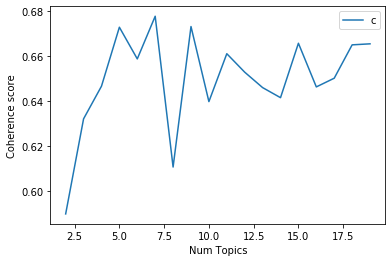

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=1)
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5899
Num Topics = 3  has Coherence Value of 0.6321
Num Topics = 4  has Coherence Value of 0.6466
Num Topics = 5  has Coherence Value of 0.6728
Num Topics = 6  has Coherence Value of 0.6587
Num Topics = 7  has Coherence Value of 0.6777
Num Topics = 8  has Coherence Value of 0.6107
Num Topics = 9  has Coherence Value of 0.6731
Num Topics = 10  has Coherence Value of 0.6398
Num Topics = 11  has Coherence Value of 0.661
Num Topics = 12  has Coherence Value of 0.6528
Num Topics = 13  has Coherence Value of 0.646
Num Topics = 14  has Coherence Value of 0.6415
Num Topics = 15  has Coherence Value of 0.6657
Num Topics = 16  has Coherence Value of 0.6463
Num Topics = 17  has Coherence Value of 0.6501
Num Topics = 18  has Coherence Value of 0.665
Num Topics = 19  has Coherence Value of 0.6654


In [26]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.023*"article" + 0.012*"zurich" + 0.011*"ppe" + 0.011*"workout" + '
  '0.010*"service" + 0.008*"opportunity" + 0.007*"time" + 0.007*"still" + '
  '0.007*"suspension" + 0.006*"double"'),
 (1,
  '0.012*"job" + 0.009*"apple" + 0.008*"help" + 0.008*"tlx" + 0.007*"type" + '
  '0.007*"virus" + 0.006*"increase" + 0.005*"start" + 0.005*"acura" + '
  '0.005*"digital"'),
 (2,
  '0.016*"news" + 0.014*"work" + 0.014*"htm" + 0.013*"article" + '
  '0.013*"doctor" + 0.011*"home" + 0.009*"release" + 0.009*"nysenow" + '
  '0.009*"read" + 0.008*"national"'),
 (3,
  '0.015*"coronavirus" + 0.015*"php" + 0.014*"update" + 0.013*"past" + '
  '0.010*"world" + 0.010*"covid" + 0.009*"may" + 0.009*"tech" + 0.008*"news" + '
  '0.007*"pr"'),
 (4,
  '0.014*"workday" + 0.012*"scar" + 0.012*"toll" + 0.012*"feel" + '
  '0.012*"fight" + 0.010*"earbuds" + 0.008*"best" + 0.008*"build" + '
  '0.007*"worker" + 0.007*"front"'),
 (5,
  '0.018*"sell" + 0.013*"news" + 0.010*"nysecrm" + 0.009*"zoom" + '
  '0.009*"earni

In [27]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)
df_dominant_topic.to_csv (r'C:\Users\emich\Google Drive\Data science\Capstone 1\df_dominant_topic.csv', index = False, header=True)

In [28]:
df ['Dominant_Topic'] = df_dominant_topic ['Dominant_Topic']
df ['Topic_Perc_Contrib'] = df_dominant_topic ['Topic_Perc_Contrib']
df ['Topic_Keywords'] = df_dominant_topic ['Keywords']
print (df.head())

                            netloc  \
0             virtual-strategy.com   
1                www.publicnow.com   
2                www.mena-tech.com   
3                www.mena-tech.com   
4  www.insurance.onlystrategic.com   

                                                path  \
0   2020 05 26 %E3%80%90scandit%E3%80%91 %E3%82%B...   
1      view 4A3C6A23AA89F7311E014F7AC701921A7793646F   
2   %D9%83%D9%8A%D9%81 %D8%AA%D8%AD%D8%A7%D9%81%D...   
3   %D9%85%D9%82%D8%A7%D8%A8%D9%84%D8%A9 %D9%85%D...   
4   features index id 1 article 73425 key 81d01a3...   

                       ('url', 'Unnamed: 0_level_1')  \
0  https://virtual-strategy.com/2020/05/26/%E3%80...   
1  http://www.publicnow.com/view/4A3C6A23AA89F731...   
2  https://www.mena-tech.com/%D9%83%D9%8A%D9%81-%...   
3  https://www.mena-tech.com/%D9%85%D9%82%D8%A7%D...   
4  http://www.insurance.onlystrategic.com/feature...   

   ('5/10/2020', 'Impressions')  ('5/10/2020', 'Unique Users')  \
0                             0

In [29]:
df.to_csv (r'C:\Users\emich\Google Drive\Data science\Capstone 1\final with topics.csv', index = False, header=True)

In [31]:
most_representative_by_topic = df.loc[(df['Topic_Perc_Contrib'] >= 0.6)]
most_representative_by_topic.to_csv (r'C:\Users\emich\Google Drive\Data science\Capstone 1\most_representative_by_topic.csv', index = False, header=True)